In [11]:
import torch
from torchvision import datasets

cifar10 = datasets.CIFAR10('data', train=True, download=True)

Files already downloaded and verified


In [12]:
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

Files already downloaded and verified


In [13]:
type(cifar10)

torchvision.datasets.cifar.CIFAR10

In [14]:
isinstance(cifar10, torch.utils.data.Dataset)

True

In [15]:
len(cifar10)

50000

In [16]:
img, label = cifar10[99]

In [17]:
print(img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x11835D978>


In [18]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
label

1

In [20]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [21]:
from torchvision import transforms

to_tensor = transforms.ToTensor()

img, label = cifar10[99]

img_t = to_tensor(img)

img_t.shape

torch.Size([3, 32, 32])

In [22]:
cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.ToTensor())

Files already downloaded and verified


In [23]:
img, _ = cifar10[99]
type(img)

torch.Tensor

In [24]:
img.shape

torch.Size([3, 32, 32])

In [25]:
img.dtype

torch.float32

In [26]:
img.min(), img.max()

(tensor(0.), tensor(1.))

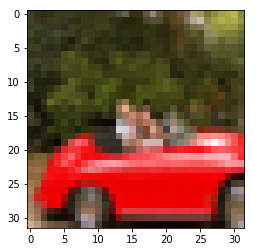

In [27]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [28]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [29]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [30]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [31]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [32]:
cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified


In [33]:
cifar10_val = datasets.CIFAR10('data', train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


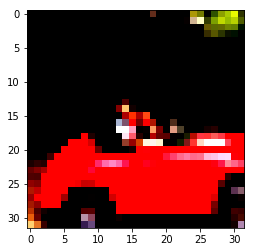

In [34]:
img, _ = cifar10[99]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [35]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [36]:
import torch.nn as nn

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, n_output_features))

NameError: name 'n_output_features' is not defined

In [37]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [38]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [39]:
softmax(x).sum()

tensor(1.)

In [52]:
import torch
import torch.nn as nn

torch.manual_seed(123)

softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [53]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


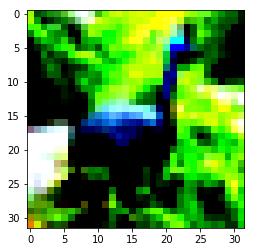

In [54]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [55]:
img_batch = img.view(-1).unsqueeze(0)

In [56]:
out = model(img_batch)
out

tensor([[0.3700, 0.6300]], grad_fn=<SoftmaxBackward>)

In [57]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [58]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [51]:
torch.log(softmax(x))

tensor([[  -inf, 0.0000]])

In [228]:
log_softmax(x)

tensor([[-104.,    0.]])

In [229]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [230]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [231]:
loss = nn.NLLLoss()

In [232]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.6509, grad_fn=<NllLossBackward>)

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-4

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

nepochs = 100

for epoch in range(nepochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.686693
Epoch: 1, Loss: 2.695894


KeyboardInterrupt: 

In [97]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

nepochs = 100

for epoch in range(nepochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

nepochs = 100

for epoch in range(nepochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.483681
Epoch: 1, Loss: 0.444471
Epoch: 2, Loss: 0.433452
Epoch: 3, Loss: 0.300507
Epoch: 4, Loss: 0.441095
Epoch: 5, Loss: 0.517073
Epoch: 6, Loss: 0.305444
Epoch: 7, Loss: 0.556281
Epoch: 8, Loss: 0.333576
Epoch: 9, Loss: 0.339125
Epoch: 10, Loss: 0.661290
Epoch: 11, Loss: 0.156344
Epoch: 12, Loss: 0.228916
Epoch: 13, Loss: 0.582214
Epoch: 14, Loss: 0.319739
Epoch: 15, Loss: 0.348913
Epoch: 16, Loss: 0.298435
Epoch: 17, Loss: 0.269637
Epoch: 18, Loss: 0.264462
Epoch: 19, Loss: 0.394460
Epoch: 20, Loss: 0.183625
Epoch: 21, Loss: 0.252047
Epoch: 22, Loss: 0.164425
Epoch: 23, Loss: 0.356711
Epoch: 24, Loss: 0.356409
Epoch: 25, Loss: 0.261684
Epoch: 26, Loss: 0.195436
Epoch: 27, Loss: 0.357038
Epoch: 28, Loss: 0.107395
Epoch: 29, Loss: 0.270044
Epoch: 30, Loss: 0.307356
Epoch: 31, Loss: 0.109826
Epoch: 32, Loss: 0.110416
Epoch: 33, Loss: 0.060309
Epoch: 34, Loss: 0.121865
Epoch: 35, Loss: 0.080135
Epoch: 36, Loss: 0.187582
Epoch: 37, Loss: 0.215502
Epoch: 38, Loss: 0.099

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [60]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.794000


In [61]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [62]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

nepochs = 100

for epoch in range(nepochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.830766
Epoch: 1, Loss: 0.537586
Epoch: 2, Loss: 0.520497
Epoch: 3, Loss: 0.551923
Epoch: 4, Loss: 0.613409
Epoch: 5, Loss: 0.367955
Epoch: 6, Loss: 0.461690
Epoch: 7, Loss: 0.440201
Epoch: 8, Loss: 0.330919
Epoch: 9, Loss: 0.672060
Epoch: 10, Loss: 0.214384
Epoch: 11, Loss: 0.289531
Epoch: 12, Loss: 0.242116
Epoch: 13, Loss: 0.528731
Epoch: 14, Loss: 0.319517
Epoch: 15, Loss: 0.344509
Epoch: 16, Loss: 0.336134
Epoch: 17, Loss: 0.530772
Epoch: 18, Loss: 0.260637
Epoch: 19, Loss: 0.502093
Epoch: 20, Loss: 0.118269
Epoch: 21, Loss: 0.411113
Epoch: 22, Loss: 0.205757
Epoch: 23, Loss: 0.332014
Epoch: 24, Loss: 0.416243
Epoch: 25, Loss: 0.400543
Epoch: 26, Loss: 0.096858
Epoch: 27, Loss: 0.447385
Epoch: 28, Loss: 0.257410
Epoch: 29, Loss: 0.229853
Epoch: 30, Loss: 0.234711
Epoch: 31, Loss: 0.112913
Epoch: 32, Loss: 0.182169
Epoch: 33, Loss: 0.256886
Epoch: 34, Loss: 0.417403
Epoch: 35, Loss: 0.250923
Epoch: 36, Loss: 0.050652
Epoch: 37, Loss: 0.269337
Epoch: 38, Loss: 0.281

In [65]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.998100


In [64]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.802000


In [108]:
sum([p.numel() for p in model.parameters()])

3737474

In [109]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [111]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [112]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [113]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [114]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [115]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [116]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [117]:
conv.bias.shape

torch.Size([16])

In [118]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [122]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

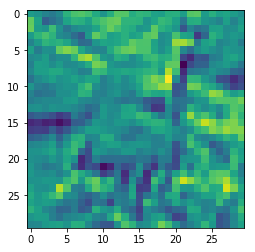

In [130]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [131]:
output.shape

torch.Size([1, 16, 30, 30])

In [169]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [170]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [171]:
with torch.no_grad():
    conv.bias.zero_()

In [172]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

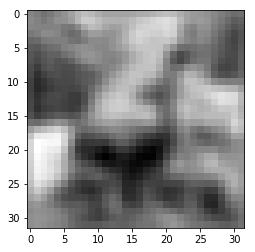

In [173]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [174]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

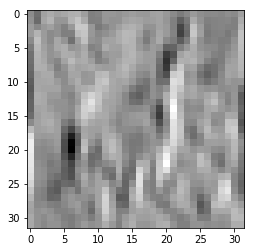

In [175]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [176]:
pool = nn.MaxPool2d(2)

In [177]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [178]:
model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            ...)

TypeError: ellipsis is not a Module subclass

In [179]:
model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(128, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [180]:
sum([p.numel() for p in model.parameters()])

10874

In [181]:
model(img.unsqueeze(0))

RuntimeError: size mismatch, m1: [32 x 4], m2: [128 x 32] at /Users/lantiga/Desktop/invariant-ai/pytorch/aten/src/TH/generic/THTensorMath.cpp:932

In [67]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [68]:
model = Net()

sum([p.numel() for p in model.parameters()])

22002

In [187]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = out.view(-1, 8 * 4 * 4)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [188]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0201, -0.1658]], grad_fn=<ThAddmmBackward>)

In [275]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

nepochs = 100

for epoch in range(nepochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.446465
Epoch: 1, Loss: 0.654896
Epoch: 2, Loss: 0.339780
Epoch: 3, Loss: 0.460466
Epoch: 4, Loss: 0.454873
Epoch: 5, Loss: 0.168036
Epoch: 6, Loss: 0.297592
Epoch: 7, Loss: 0.384782
Epoch: 8, Loss: 0.645598
Epoch: 9, Loss: 0.159519
Epoch: 10, Loss: 0.217299
Epoch: 11, Loss: 0.252308
Epoch: 12, Loss: 0.549105
Epoch: 13, Loss: 0.196273
Epoch: 14, Loss: 0.506769
Epoch: 15, Loss: 0.198482
Epoch: 16, Loss: 0.173888
Epoch: 17, Loss: 0.315105
Epoch: 18, Loss: 0.138680
Epoch: 19, Loss: 0.302249
Epoch: 20, Loss: 0.347972
Epoch: 21, Loss: 0.167680
Epoch: 22, Loss: 0.134659
Epoch: 23, Loss: 0.583311
Epoch: 24, Loss: 0.207660
Epoch: 25, Loss: 0.121527
Epoch: 26, Loss: 0.284999
Epoch: 27, Loss: 0.320392
Epoch: 28, Loss: 0.417843
Epoch: 29, Loss: 0.404884
Epoch: 30, Loss: 0.236999
Epoch: 31, Loss: 0.426667
Epoch: 32, Loss: 0.362905
Epoch: 33, Loss: 0.551533
Epoch: 34, Loss: 0.224683
Epoch: 35, Loss: 0.074177
Epoch: 36, Loss: 0.336616
Epoch: 37, Loss: 0.099106
Epoch: 38, Loss: 0.313

In [277]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.963100


In [276]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.889500
